In [8]:
  #!unzip "/content/drive/My Drive/dog-vision/dog-breed-identification.zip" -d "/content/drive/My Drive/dog-vision"

# get our workspace ready ☻

In [2]:
# import tensorflow into clab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version", tf.__version__)
print("TF_hub version",hub.__version__)

# check for gpu availability
#print("GPU","availabel (yessssss)" if tf.config.list_physical_devices("GPU") else "GPU not availabel:( ")

TF version 2.1.0
TF_hub version 0.8.0


In [3]:
 import pandas as pd
 import numpy as np 
 import matplotlib.pyplot as plt

## getting our data redy (turnig into Tensors)
le's start accesing our data and cheking our labels

In [4]:
labels_csv = pd.read_csv("dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     421c63f9911a67eb38401c4c51c9b294  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [5]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [6]:
# how many images are there of each bredd 
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [7]:
labels_csv['breed'].value_counts().median()

pandas.core.series.Series

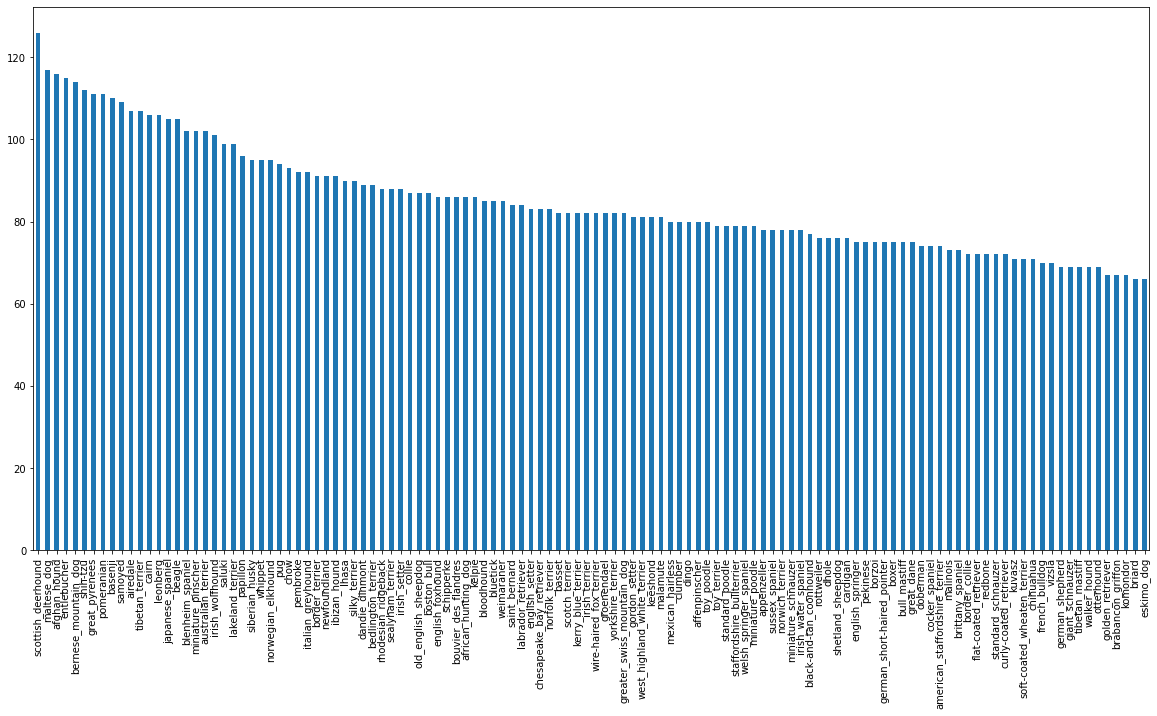

In [61]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

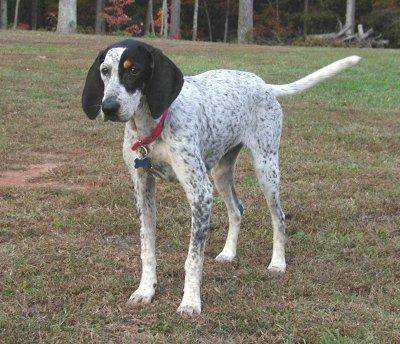

In [62]:
# let's view an image
from IPython.display import Image
Image("dog-breed-identification/train/"+labels_csv.loc[3,"id"]+".jpg")

In [63]:
# how to use loc and get specific id
labels_csv.loc[1,"id"]

'001513dfcb2ffafc82cccf4d8bbaba97'

### Getting images and there labels

In [64]:
# create pathnames from image id
filenames = ["dog-breed-identification/train/"+fname+".jpg" for fname in labels_csv["id"]]

# check the first 10
filenames[:10]

#filenames1 = os.listdir("dog-breed-identification/train") # we can do aloso like this but we want files arenged sown in csv file

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [65]:
# check wheter number of filenames matches number of actual image files
import os
if len(os.listdir('dog-breed-identification/train')) == len(filenames):
  print("filenames match actual amount of files")
else:
  print("filenames and actual files not match")

filenames match actual amount of files


In [66]:
filenames[1], filenames1[1]

NameError: name 'filenames1' is not defined

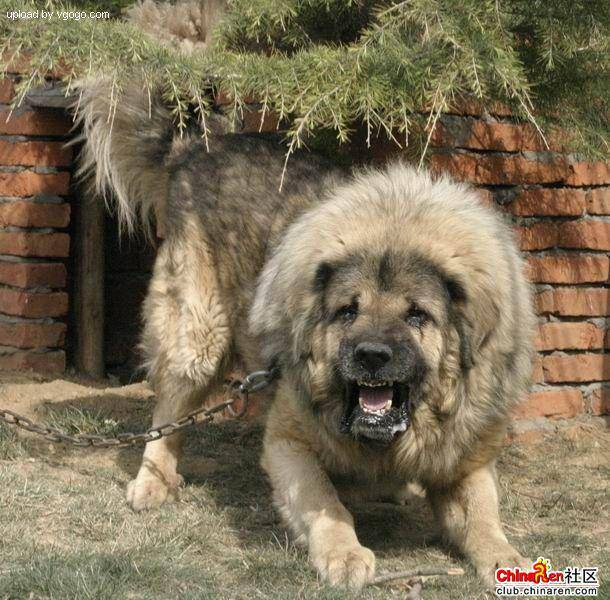

In [67]:
# one more check
Image(filenames[9000])

In [68]:
labels_csv["breed"][9000]

'tibetan_mastiff'

# since we've now got out trainig images filepath in a list let's prepare our label

In [69]:
# or we can do labels = np.array( labels_csv['breed']) 
labels= labels_csv['breed'].to_numpy() 
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [70]:
len(labels)

10222

In [71]:
# see if nummber of labels matches the number of filenames
if len(labels) == len(filenames):
  print("number of labels ar match with number of filenames")
else:
  print("dosnot match")

number of labels ar match with number of filenames


In [72]:
## find the uniqe label value
uniquebreed = np.unique(labels)
len(uniquebreed)


120

In [73]:
len(uniquebreed)

120

In [74]:
# turn a single label into an array of booleans
print(labels[0])
labels[0]==uniquebreed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [75]:
 boolean_labels = [label == uniquebreed for label in labels]
 boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [76]:
len(boolean_labels)

10222

In [77]:
# example turnig boolean array into intigers
print(labels[0])# orignal lable

print(np.where(uniquebreed == labels[0])) # index where label ocures

print(boolean_labels[0].argmax()) # index where label occurs in boolean array

print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occures

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [78]:
labels[0]

'boston_bull'

In [79]:
labels_csv['breed'].value_counts()['tibetan_mastiff']

69

# creating our own validation set

In [80]:
# setup X & Y variable

X = filenames
Y = boolean_labels

In [81]:
len(X)

10222

In [82]:
len(filenames)

10222

we're going to start of expermenting with only 1000 images and increse if we needed becouse processing time is very high to prosess all images 

In [83]:
# set number of images to use for experimenting

NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000,step:1000}

In [84]:
# let's split data into train and validation set

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X[:NUM_IMAGES],
                                                  Y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42) # random_state is iqual to random.seed(42)
len(X_train), len(X_val), len(Y_train), len(Y_val)                                               

(800, 200, 800, 200)

In [85]:
X_train[0], Y[0]

('dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
     

# preprocessing images (tunig images into number/ tensors)

### creting fuction to do bunch of things for us
 * 1: take image/file pathe as input
 * 2: use tensorflow to read the file and save into a variable `image`
 * 3: turn our `images` into tensors/ numbers
 * 4: resize the `image` to be a shape of (224,224)
 * 5: return the modified `image`


In [86]:
# convert image into numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) 
image.shape

(257, 350, 3)

In [87]:
image.max(), image.min()

(255, 0)

In [88]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [89]:
# turned imge into tensors
tf.constant(image)[:2]


<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

 ## Turning our data into batches

 Why turn our data into batches?

 let's say you're trying to process 10,000+ images in on go... they all might not fit into memory.

so that's ehy we do about 32(this is the batch size) images at a time (yo can manually adjust the batch size if need be)

in order to use Tensoreflow effectively, we need our data in the form of tensor tuples which look like this:
`(image, label)`

In [91]:
# create a simple function to return a tuple of (image, label)
def get_image_label(image_path,label):
  """ 
  take image and return processed image and label
  """
  image = process_image(image_path)
  return image, label

In [92]:
get_image_label(X[42], tf.constant(Y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

now we've got way to turn our data into tupales of tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X' & `Y') into batches

In [93]:
# define the batches size 32 is good into batches
BATCH_SIZE = 32

# create function to turn into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data= False, test_data=False ):
  """
  create batches of data our data out of image X and label Y pairs.
   shuffles the data if it's training data but doesn't shuffle if it's validation data.
   also accept test data as input (no labels)
  """

  # if the data is a test dataset, we probably don,t have labels

  if test_data:
    print("create test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepath no labels
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  # if the data is a valid dataset, we don't need to shuffle it 
  elif valid_data :
    print("creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices(
                                             (tf.constant(x), # filepath
                                             tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("create trainig data batches...")
    # turn file path and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    # shuffling pathnames and labels before mapping image processor function is faster than shufling images
    data = data.shuffle(buffer_size=len(x))

    # create (image, label) tuples and turn image into preprocess
    data = data.map(get_image_label)

    # turn the trainig data into batches
    data_batch = data.batch(batch_size)
    return data_batch

In [94]:
# create traing and validation data batches
train_data = create_data_batches(X_train, Y_train)
val_data = create_data_batches(X_val, Y_val, valid_data=True)

create trainig data batches...
creating validation data batches...


In [95]:
# check out diffrent attributes of our data batches

train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [96]:
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

##visulaizing data batches

ou data is now in batches, however, these can be alittle har to undestand/comprehend, let's visualize the data

In [97]:
# create function for viewing images in data batch

def show_25_images(images, labels):
  """
  display a plot of 5 images and their labels from a data batch
  """
  # setup the figure
  plt.figure(figsize=(10,10))
  # loop through 25 for displaying 25 images
  for i in range(25):
    # create subplots (5 row, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # display an image
    plt.imshow(images[i])
    # add the image labels as the title
    plt.title(uniquebreed[labels[i].argmax()])
    # turn the grid lines off
    plt.axis("off")

In [98]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [99]:
train_images, train_labels = next(train_data.as_numpy_iterator())
#train_images, train_labels

32 32


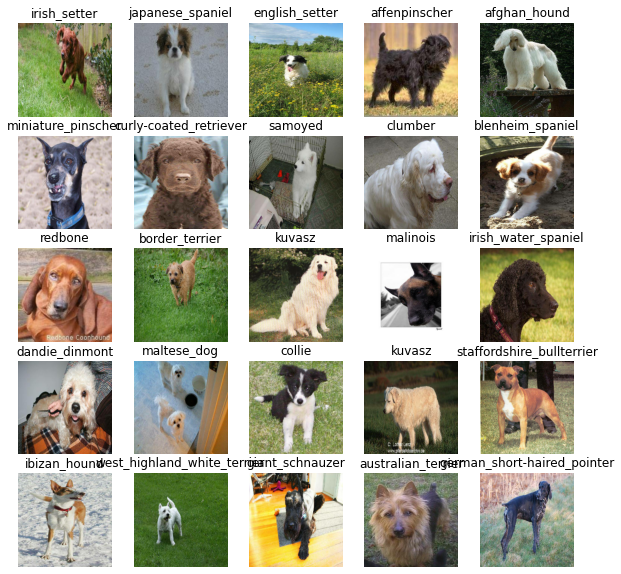

In [100]:
print(len(train_images), len(train_labels))
# now let's visualize data
show_25_images(train_images, train_labels)

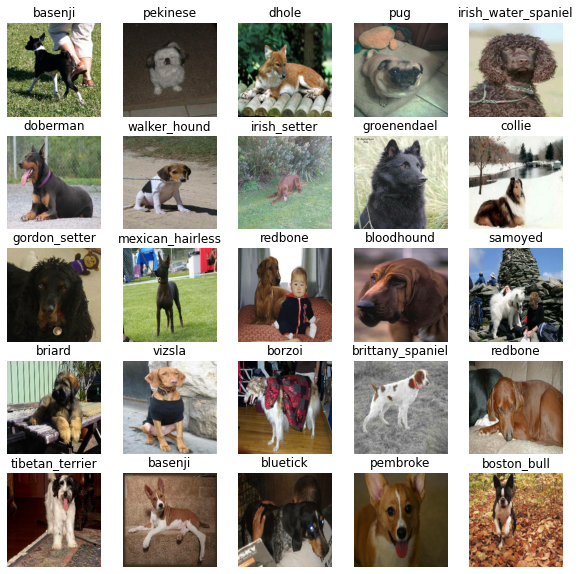

In [101]:
val_images, val_labels = next(train_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## bulding  a model

before we build model, there are few things we need to define:
* the input shape ( our image shape in the form of tensors) to our model.
* the output shape ( image labels, in the form of tensors) of our model.
* the URL of the model we want to use.

In [102]:
IMG_SIZE

224

In [103]:
# setup input shape to the model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(uniquebreed)

# setup model URL from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
            

now we've got our input output and model ready to go.
let's put them together into a keras deep learning model

Knowing this let's create a function which:
* take the input shape, output sahpe and the model we've chosen as parameters.
* difines the layers in a keras model in sequnential fashion (do this first, then this then that).
* compiles the model (says it should be evaluated and improved).
* builds the model (tells the model the input shape it'll be getting)
* return model

In [110]:
INPUT_SHAPE

[None, 224, 224, 3]

In [122]:
# create a function which builds a "Keras" model

def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("bulding model with", model_url)
  
  # step the model layers
  model = tf.keras.Sequential([
          hub.KerasLayer(model_url), # layer 1 (input layer)
          tf.keras.layers.Dense(units = 120,
                                activation = 'softmax') # layer 2 (output layer)
  ])

  # compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
      
  )

  # build the model
  model.build(input_shape)
  return model

In [123]:
model = create_model()
model.summary()

bulding model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_6 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [84]:
model.save("model_save/manual_saved.h5")

### creating callbacks

callback are helper functions a model can use during training to do so such thingd=s as save its progress, check its progress or stop training early if a model stops improving

we'll create tow callbacks, one for TensorBoard which helps track our models progress and another for early stopiing which prevents our model from trainig for too long


### TensorBoard callback

TO setup tensorboard callback we need to do 3 things
1. load TensorBoard notebook extension
2. create tensorboard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. visualize our models training logs with the %tensorboard magic function (we do this after model trainig).

In [125]:
# load TensorBord notebook extension
%load_ext tensorboard

In [58]:
import datetime

# create a function to build a tensorboard callback
def create_tensorboard_callback():

  # create log directory in google drive for storing tensorboard logs 
  logdir = os.path.join("logs",
                        # make it so the log get traked whenever we run an experiment
                        datetime.datetime.now().strftime("%y%m%d-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)


### arly stoping callback

early stoping  helps stop our model from overfiting by stopping traning if a certain evaluation metric stops

In [59]:
# create early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

 ## training tha model (on subset)

 our first model is only going to train on 1000 img to make sure evrithing is working

In [60]:
NUM_EPOCHS = 100 #@param {type:'slider', min:10, max:100, step:10}

In [61]:
# check to make shour we're stil running on a gpu
print("gpu", "avilabel (yessssss)" if tf.config.list_physical_devices("GPU") else "not availabel")

gpu not availabel


let's a create a function which trains a model.

* create a model using `create_tensorboard_callback()`
* 

In [62]:
# buld a function and return a trained model

def train_model():
  """
  train a given model and returns the traind model
  """
  # create model
  model = create_model()

  # create new TensorBoard session everytime we train the model
  tensorboard = create_tensorboard_callback()

  # fit the model data passing it the callback we create it
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  # return the fitted model
  return model

In [63]:
# fit the model to the data
model = train_model()

bulding model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Train for 25 steps, validate for 7 steps
Epoch 1/100
25/25 [==============================] - 58s 2s/step - loss: 4.5949 - accuracy: 0.0887 - val_loss: 3.5303 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 49s 2s/step - loss: 1.6366 - accuracy: 0.6825 - val_loss: 2.1594 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 49s 2s/step - loss: 0.5542 - accuracy: 0.9388 - val_loss: 1.6442 - val_accuracy: 0.5900
Epoch 4/100
25/25 [==============================] - 46s 2s/step - loss: 0.2524 - accuracy: 0.9837 - val_loss: 1.4768 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 47s 2s/step - loss: 0.1446 - accuracy: 0.9975 - val_loss: 1.4121 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 49s 2s/step - loss: 0.1000 - accuracy: 0.9987 - val_loss: 1.3628 - val_accuracy: 0.6300
Epoch 7/100
25/25 [===

note: overfitting to begin with is good thing it means our model is leaning!!

what are some ways to prevent model overfitting in deep learning network?


In [64]:
model.save("model_save/trained_model.h5")

### check the TensorBoard logs

the tensorboard magic function (%tensorboard) will access the logs directory we created and visualize it's contents.

In [65]:
# we use between 
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


### making and evaluateting predictions using a trained model

In [129]:
# making prediction validation data (not used on train data)

prediction = model.predict(val_data, verbose=1)
prediction

7/7 [==============================] - 11s 2s/step


array([[0.0213149 , 0.00307108, 0.00296864, ..., 0.04539321, 0.03372207,
        0.00568008],
       [0.00154468, 0.00090841, 0.00114458, ..., 0.00392502, 0.04174255,
        0.00660896],
       [0.0171077 , 0.0228168 , 0.00254469, ..., 0.01804059, 0.00677114,
        0.00280976],
       ...,
       [0.0110544 , 0.00267798, 0.01368856, ..., 0.01043446, 0.01104934,
        0.001829  ],
       [0.01444224, 0.00504904, 0.02712808, ..., 0.08413964, 0.0011339 ,
        0.00066955],
       [0.00016508, 0.00600355, 0.00276459, ..., 0.00619379, 0.01183954,
        0.00322638]], dtype=float32)

In [130]:
for i in range(len(prediction[:5])):
  print(f"confidentt about image: {np.max(prediction[i])} \ndog name: {uniquebreed[np.argmax(prediction[i])]}\n","-"*50)


confidentt about image: 0.11372240632772446 
dog name: bull_mastiff
 --------------------------------------------------
confidentt about image: 0.11301930993795395 
dog name: vizsla
 --------------------------------------------------
confidentt about image: 0.09754618257284164 
dog name: boxer
 --------------------------------------------------
confidentt about image: 0.19875288009643555 
dog name: malinois
 --------------------------------------------------
confidentt about image: 0.12041328847408295 
dog name: kerry_blue_terrier
 --------------------------------------------------


In [131]:
uniquebreed[np.argmax(prediction[0])]

'bull_mastiff'

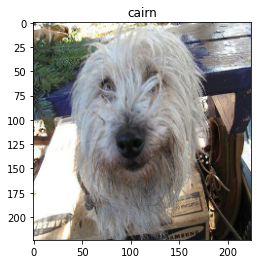

In [132]:
i1, l1 = next(val_data.as_numpy_iterator())
index = 0
plt.imshow(i1[index])
plt.title(uniquebreed[np.argmax(l1[index])])
plt.show()


having the above functionality is grate but we want to able to do it at scale.

and it would even better if we could see the image the prediction is being made on!

**note** prediction probablities are also known as confidence lavels

In [133]:
## turn predicyion probabilities into their respective label (easier to under stand)

def get_pred_label(pred_proba):
  """"
  turn any array of prediction into a label
  """
  return uniquebreed[np.argmax(pred_proba)]


In [134]:
# get a prediction label on array of prediction probabilities

pred_label = get_pred_label(prediction[0])
pred_label

'bull_mastiff'

In [72]:
# our validation data is in batch file so un batch and comper with our prediction
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

# converting nparray into images

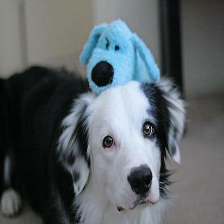

In [73]:
import PIL.Image as pilimage

pilimage.fromarray((i1[11]*255).astype(np.uint8))

In [74]:
## unbatch the data

images_ = []
labels_ = []

# loop for unbatch the data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

# converting numpy array into image and save into drive


In [77]:
saveimage = pilimage.fromarray((images_[61]*255).astype(np.uint8))
saveimage.save("dog_photos/image_61.png")

In [78]:
get_pred_label(labels_[0])

'cairn'

In [79]:
get_pred_label(prediction[0])

'cairn'

In [80]:
def actual_and_prediction_label(actual_label, prediction_label):
  i = 0
  print("actual label  |   predicted label \n")
  for image, label in actual_label.unbatch().as_numpy_iterator():
    print(f"{get_pred_label(label)} ------> {get_pred_label(prediction_label[i])} \n")
    i+=1
    if i==10:
      break
      

In [81]:
actual_and_prediction_label(val_data, prediction)

actual label  |   predicted label 

cairn ------> cairn 

scotch_terrier ------> miniature_schnauzer 

basset ------> basset 

bluetick ------> lakeland_terrier 

airedale ------> airedale 

bedlington_terrier ------> bedlington_terrier 

keeshond ------> norwegian_elkhound 

old_english_sheepdog ------> old_english_sheepdog 

saint_bernard ------> saint_bernard 

border_collie ------> collie 



In [82]:
def unbatchify(data):
  """
  take batch dataset of (image, label) Tensors and returns seperated array
  of images and labels
  """
  images = []
  labels = []

  # loop through unbatch data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(uniquebreed[np.argmax(label)])

  return images, labels


# unbatchify the validation data

val_images, val_labels = unbatchify(val_data)

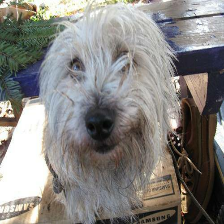

In [83]:
pilimage.fromarray((val_images[0]*255).astype(np.uint8))

In [84]:
get_pred_label(val_labels[0])

'affenpinscher'

now we've got ways to get :
* prediction labels
* validation labels (truth labels)
* validation images

let's make some function to make these all a bit more vissulize

we'll create a function which:
* takes an array of prediction probabilities, an aaray of truth labels and an array of images and integers.
* convert the prediction probabilities to a predicted label.
* plot the predicted label, its predicted probabillty, the truth label and target image on a single plot

In [85]:
def plot_pred(prediction_probabilies, labels, images, n=1):

  """
  viwe the prediction, ground thruth and image for sample n
  """
  pred_proba, true_label, image = prediction_probabilies[n], labels[n], images[n]


  # get the pred label
  pred_label = get_pred_label(pred_proba)

  # plot image & remove ticks

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # cahnge the colour of the title depending on on prediction is write or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # change plot title to be predicted, probability of prediction and truth label
  plt.title(" {}  {:2.0f}%   {}".format(pred_label,
                                      np.max(pred_proba)*100,
                                      true_label),
                                      color = color)

  

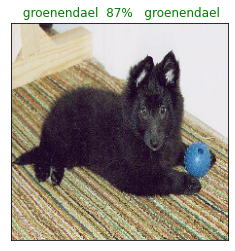

In [86]:
plot_pred(prediction,
          val_labels,
          val_images, 
          n = 77)

now we've got one function to visualize our models top prediction, let's make another to view our models top  10 prediction

This function will dispaly top 10 prediction

In [87]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  plus the top 10 highest prediction confidances along with the truth label for sample n.
  """

  pred_proba, true_label = prediction_probabilities[n], labels[n]

  #get prediction label
  pred_label = get_pred_label(pred_proba)

  # find top 10 prediction confidance indexes
  top_10_pred_index = pred_proba.argsort()[-10:][::-1]

  # find the top 10 prediction confidence values
  top_10_pred_values = pred_proba[top_10_pred_index]

  # find the top 10 prediction labels
  top_10_pred_labels = uniquebreed[top_10_pred_index]


  # setup plot

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="gray")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')
  # change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green") 


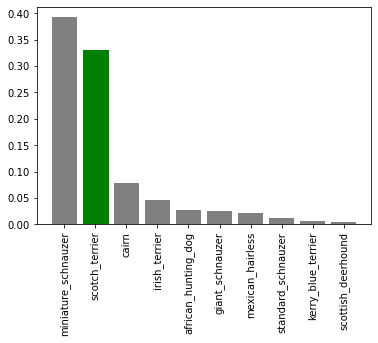

In [88]:
plot_pred_conf(prediction,
               val_labels,
               1)

now we've got some function to help us visualize our predictions and evaluate our model let's check out

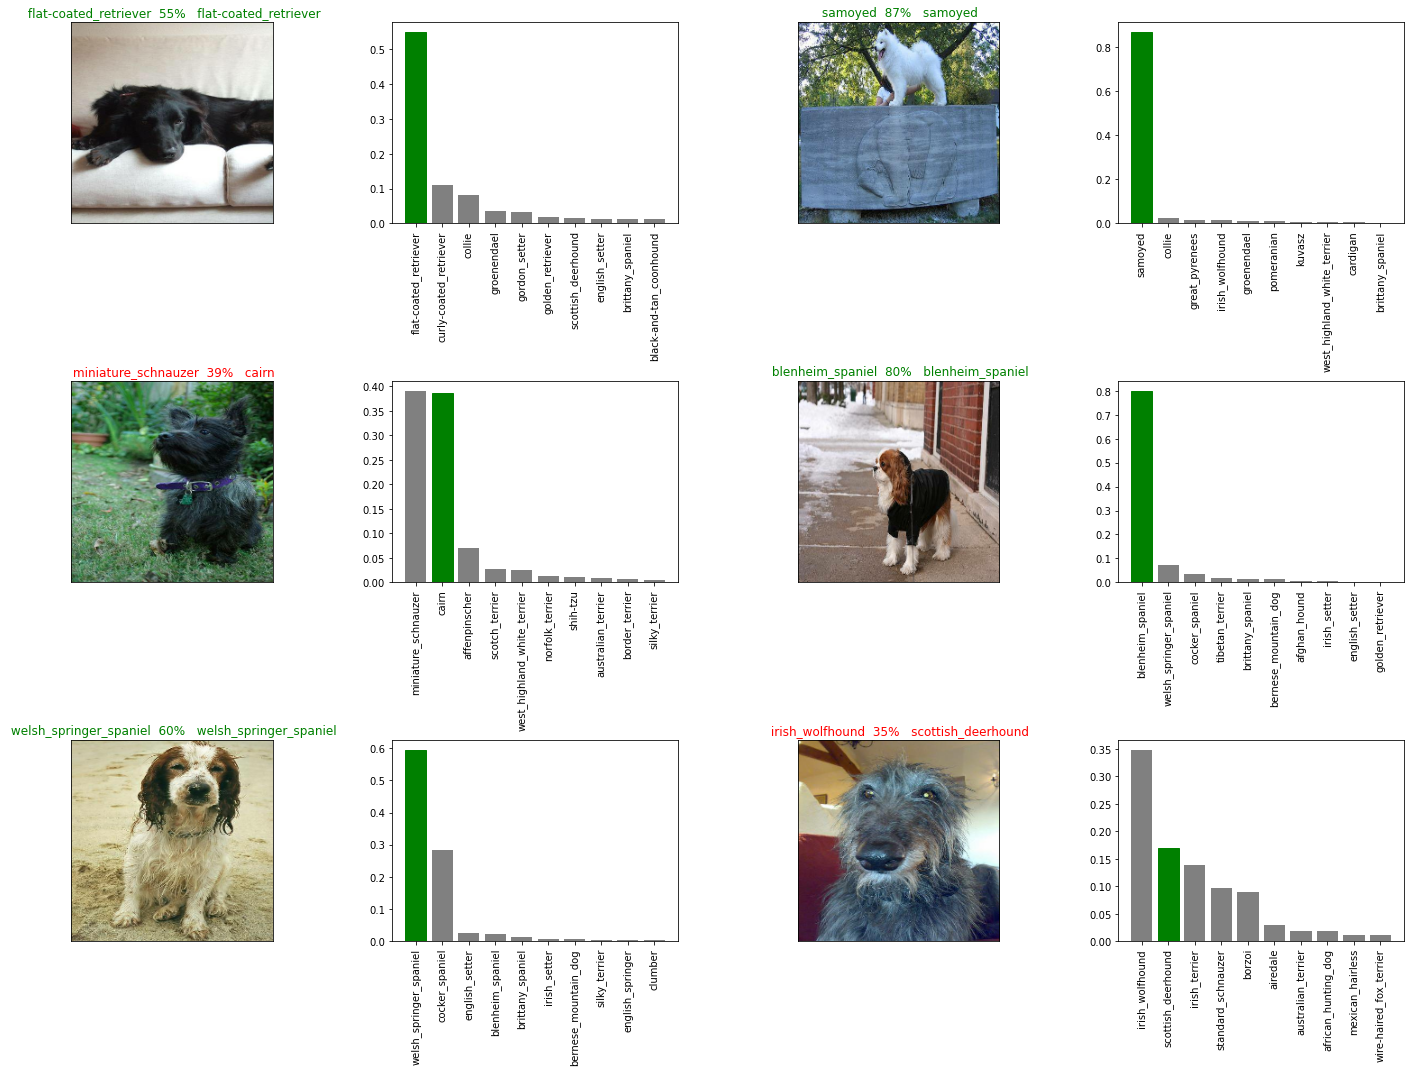

In [89]:
## let's check out a few prediction and their diifrent values

i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction,
            val_labels,
            val_images,
            i+i_multiplier)
  plt.subplot(num_rows,2*num_cols, 2*i+2)
  plot_pred_conf(prediction,
                 val_labels,
                 i+i_multiplier)

plt.tight_layout(h_pad = 1.0)
plt.show()

## saving and reloding a trained model

In [90]:
# create a function to save a model

def save_model(model, suffix = None):
  """
  seves a given model in a model directory and appends a suffix (string).
  """
  # create a model directory pathname and current time

  modeldir = os.path.join("model_save",
                          datetime.datetime.now().strftime("%d%m%Y-%H%M%S"))
  model_path = modeldir + '-' + suffix + '.h5' # save format of model
  print(f"model saved on this path{model_path}")
  model.save(model_path)
  return model_path
                          
  

In [91]:
# create a function to load model

def load_model(model_path):
  """
  load a saved model from specified path
  """
  print(f"loding model saved on-> {model_path}  this path")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer" : hub.KerasLayer})
  return model

In [92]:
# save our model trained on 1000 images

path_got = save_model(model, suffix="1000-images-mobilenetv2-Adam")

model saved on this pathmodel_save\29072020-005504-1000-images-mobilenetv2-Adam.h5


In [93]:
saved_model = load_model(path_got)

loding model saved on-> model_save\29072020-005504-1000-images-mobilenetv2-Adam.h5  this path


In [94]:
# evaluate the pre saved model
# old model first
model.evaluate(val_data)

7/7 [==============================] - 10s 1s/step - loss: 1.2697 - accuracy: 0.6450


[1.2697033456393652, 0.645]

In [95]:
saved_model.evaluate(val_data)

7/7 [==============================] - 10s 1s/step - loss: 1.2697 - accuracy: 0.6450


[1.2697033456393652, 0.645]

# train our model with wholl data

In [96]:
len(X), len(Y)

(10222, 10222)

In [97]:
X[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [98]:
X_train[:5]

['dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [99]:
# create a data batch full data set

full_data = create_data_batches(X, Y)

create trainig data batches...


In [100]:
# create a model full data
full_model = create_model()

bulding model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [102]:
# create full model call back

full_model_tensorboard = create_tensorboard_callback()

# no validation set when trainig on all the data so we cant monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

**Note** running the cell below will take a little while 30 to 60 minutes

In [103]:
 # fit the full model to the full data

 full_model.fit(x=full_data,
                epochs=NUM_EPOCHS,
                callbacks=[full_model_tensorboard, full_model_early_stopping])

Train for 320 steps
Epoch 1/100
320/320 [==============================] - 502s 2s/step - loss: 1.3554 - accuracy: 0.6643
Epoch 2/100
320/320 [==============================] - 473s 1s/step - loss: 0.4045 - accuracy: 0.8803
Epoch 3/100
320/320 [==============================] - 473s 1s/step - loss: 0.2359 - accuracy: 0.9352
Epoch 4/100
320/320 [==============================] - 473s 1s/step - loss: 0.1560 - accuracy: 0.9625
Epoch 5/100
320/320 [==============================] - 476s 1s/step - loss: 0.1052 - accuracy: 0.9792
Epoch 6/100
320/320 [==============================] - 474s 1s/step - loss: 0.0780 - accuracy: 0.9870
Epoch 7/100
320/320 [==============================] - 471s 1s/step - loss: 0.0571 - accuracy: 0.9926
Epoch 8/100
320/320 [==============================] - 473s 1s/step - loss: 0.0461 - accuracy: 0.9933
Epoch 9/100
320/320 [==============================] - 471s 1s/step - loss: 0.0375 - accuracy: 0.9957
Epoch 10/100
320/320 [==============================] - 473s 1

In [105]:
full_model.save("model_save/fuliy_loded.h5")

In [106]:
# save the loaded model
save_model(full_model, suffix='whole-trained-model-mobilenetv2-Adam')

model saved on this pathmodel_save\29072020-050544-whole-trained-model-mobilenetv2-Adam.h5


'model_save\\29072020-050544-whole-trained-model-mobilenetv2-Adam.h5'

In [112]:
loaded_full_model = full_model

In [ ]:
# loda the saved model
loaded_full_model = load_model(path_save_model)

# making prediction on test data set

since our model has been trained on images in the form of tensor batches, to make prediction on the test data, we'll have to get in same format.

luckily we created created `create_data_batches()` earlier which help us

In [107]:
# load test image fill name
test_path = "dog-breed-identification/test/"

test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:5]


['dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg']

In [108]:
len(test_filenames)

10357

In [109]:
# create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

create test data batches...


In [110]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [113]:
# make prediction on test data batch using full trained model

test_prediction = loaded_full_model.predict(test_data,
                                            verbose=1)

324/324 [==============================] - 490s 2s/step


In [114]:
# save prediction (Numpy array) to csv file (for access later)
np.savetxt("preds_array.csv", 
           test_prediction, 
           delimiter=',')

In [116]:
# local prediction (Numpy array) from csv file
test_prediction = np.loadtxt("preds_array.csv",
                             delimiter=',')

In [118]:
test_prediction[:10]

array([[4.71937647e-13, 1.60318685e-13, 6.35075989e-17, ...,
        3.56493128e-15, 3.69598553e-11, 1.13603907e-12],
       [1.91048585e-07, 7.89514516e-08, 9.70386993e-10, ...,
        1.20413369e-12, 2.11017106e-08, 2.69135825e-11],
       [6.69009932e-13, 4.25601030e-08, 3.71764564e-10, ...,
        2.46107534e-09, 8.24198457e-13, 1.25796368e-12],
       ...,
       [1.44738901e-10, 4.34613803e-12, 8.01738938e-13, ...,
        6.18960314e-14, 6.33425875e-14, 1.56943230e-12],
       [1.96817145e-13, 1.32920263e-11, 1.34270698e-12, ...,
        1.21128689e-08, 3.34025307e-10, 6.38191268e-13],
       [5.55214798e-11, 4.36742087e-13, 4.43335554e-13, ...,
        2.03954759e-14, 5.47422351e-13, 4.56147031e-09]])

In [121]:
test_prediction.shape

(10357, 120)

## preparing test dataset prediction for kaggle

Looking at the kaggle sample submition to save in csv

In [125]:
# create a pandas dataframe with empty columns

pred_df = pd.DataFrame(columns = ["id"] + list(uniquebreed))
pred_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [126]:
test_filenames[:5]

['dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg']

In [127]:
# append test image id's to prediction dataframe

test_id = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
pred_df['id'] = test_id

In [128]:
pred_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [130]:
# add the prediction pobabilities to each dog breed column

pred_df[list(uniquebreed)] = test_prediction
pred_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   4.71938e-13  1.60319e-13   
1  00102ee9d8eb90812350685311fe5890   1.91049e-07  7.89515e-08   
2  0012a730dfa437f5f3613fb75efcd4ce    6.6901e-13  4.25601e-08   
3  001510bc8570bbeee98c8d80c8a95ec1   1.37704e-07  1.11467e-08   
4  001a5f3114548acdefa3d4da05474c2e   8.19529e-05  3.52597e-06   

  african_hunting_dog     airedale american_staffordshire_terrier  \
0         6.35076e-17   1.5594e-15                    4.18145e-14   
1         9.70387e-10  3.89498e-11                    1.19646e-07   
2         3.71765e-10  8.82365e-12                    1.14597e-11   
3         1.07444e-08  7.71999e-08                    2.16409e-06   
4         9.64814e-10  1.42221e-10                    4.60427e-10   

   appenzeller australian_terrier      basenji       basset  ...   toy_poodle  \
0  2.25153e-13        3.19652e-18  8.64561e-14  2.00398e-15  ...  1.17191e-13   
1  5.13905e-10        9.81207e-08  1.87464e-08   4.2898e-09  ...  2.01819e-10   
2  2.13325e-10        3.31045e-12  3.81501e-14  3.01637e-11  ...  1.35126e-14   
3  1.22032e-06        1.38707e-13  1.64595e-10  1.44035e-08  ...  1.78498e-08   
4   5.4062e-12        7.51252e-11  5.57116e-10  2.64074e-09  ...  2.21454e-08   

   toy_terrier       vizsla walker_hound   weimaraner welsh_springer_spaniel  \
0  6.33837e-16   2.3094e-16  5.85388e-17  2.04708e-16            7.39546e-15   
1  1.91353e-08  6.34249e-10   8.3903e-07  5.19164e-09             6.7492e-09   
2   2.7509e-12   4.2477e-09  8.57419e-08   7.3496e-09            2.50879e-09   
3  4.45499e-12  4.02948e-07  3.86394e-11  3.55686e-08            4.45764e-11   
4  3.37496e-11  6.55652e-12  6.33261e-12  5.89785e-11            1.40531e-10   

  west_highland_white_terrier      whippet wire-haired_fox_terrier  \
0                 2.04904e-14  3.56493e-15             3.69599e-11   
1                 0.000243771  1.20413e-12             2.11017e-08   
2                 3.35158e-15  2.46108e-09             8.24198e-13   
3                 8.76822e-20   0.00203876             1.41244e-12   
4                 2.58191e-12  7.43533e-10             1.70659e-11   

  yorkshire_terrier  
0       1.13604e-12  
1       2.69136e-11  
2       1.25796e-12  
3       2.68423e-08  
4       1.05726e-08  

[5 rows x 121 columns]

In [131]:
# save pred_df dataframe in csv submition
pred_df.to_csv("model_prediction_csv_for_kaggle.csv",
               index=False)

## making prediction on our custome images

In [139]:
## get our images filepath

images_path = "my-dog-photos/"
my_images_path = [images_path + fname for fname in os.listdir(images_path)] 


In [140]:
my_images_path

['my-dog-photos/000621fb3cbb32d8935728e48679680e.jpg',
 'my-dog-photos/00102ee9d8eb90812350685311fe5890.jpg',
 'my-dog-photos/0012a730dfa437f5f3613fb75efcd4ce.jpg']

In [141]:
# turn images into batch database

my_images = create_data_batches(my_images_path,test_data=True)
my_images

create test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [142]:
# make prediction on the my images data
my_preds = loaded_full_model.predict(my_images)

In [143]:
my_preds.shape

(3, 120)

In [144]:
my_image_labels = [get_pred_label(my_preds[i]) for i in range(len(my_preds))]
my_image_labels

['japanese_spaniel', 'samoyed', 'english_setter']

In [149]:
# viwe our prediction images
unbatch_images = []
for images in my_images.unbatch().as_numpy_iterator():
  unbatch_images.append(images)

In [150]:
# plot the my images

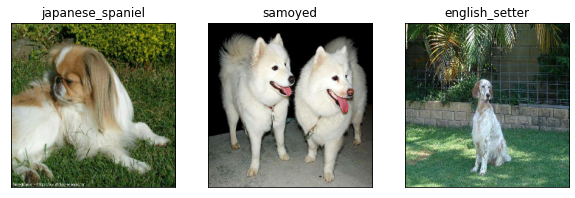

In [153]:
plt.figure(figsize=(10,10))

for i, image in enumerate(unbatch_images):
  plt.subplot(1,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(my_image_labels[i])
  plt.imshow(image)